**Logistic Regression**

**Import libraries**


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_classification

"to create dataset such a way that we do not need do standardization"


'to create dataset such a way that we do not need do standardization'

In [3]:
#create dataset

X,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)

#total 1000 samples in dataset
#10 features-columns
#binary classification problem so 2 classes

In [4]:
X=pd.DataFrame(X)

In [5]:
y=pd.DataFrame(y)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=9)

In [7]:
# Model training

from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression()

In [8]:
#fit the model

logistic.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [9]:
y_pred=logistic.predict(X_test)
print(y_pred)

[1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1
 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0
 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0
 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0
 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 0]


In [10]:
#find probability of each class

logistic.predict_proba(X_test)


array([[2.67857471e-02, 9.73214253e-01],
       [8.45574650e-03, 9.91544254e-01],
       [2.21028894e-01, 7.78971106e-01],
       [1.27269973e-01, 8.72730027e-01],
       [3.07228713e-01, 6.92771287e-01],
       [9.30253269e-01, 6.97467307e-02],
       [9.56657924e-01, 4.33420765e-02],
       [1.12800632e-02, 9.88719937e-01],
       [8.74998539e-01, 1.25001461e-01],
       [9.63863611e-01, 3.61363889e-02],
       [1.32004548e-01, 8.67995452e-01],
       [9.75158102e-01, 2.48418983e-02],
       [6.42427253e-01, 3.57572747e-01],
       [8.23644528e-01, 1.76355472e-01],
       [2.21632871e-01, 7.78367129e-01],
       [2.36543082e-03, 9.97634569e-01],
       [8.58931504e-01, 1.41068496e-01],
       [9.14147486e-01, 8.58525139e-02],
       [9.76167706e-01, 2.38322943e-02],
       [2.90278074e-02, 9.70972193e-01],
       [6.03395120e-01, 3.96604880e-01],
       [9.97965199e-01, 2.03480114e-03],
       [1.66779798e-03, 9.98332202e-01],
       [5.17029676e-02, 9.48297032e-01],
       [1.076452

In [11]:
#Performance matrix

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [12]:
score=accuracy_score(y_test,y_pred)
print(score)

cm=confusion_matrix(y_test,y_pred)
print(cm)

report=classification_report(y_test,y_pred)
print(report)

" change random state value and will get different score each time"

0.8533333333333334
[[127  22]
 [ 22 129]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       149
           1       0.85      0.85      0.85       151

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



' change random state value and will get different score each time'

**Grid Search Hyper parameter**

In [13]:
"""
class sklearn.linear_model.LogisticRegression
(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True,
intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs',
max_iter=100, multi_class='deprecated', verbose=0, warm_start=False,
n_jobs=None, l1_ratio=None)
"""

"\nclass sklearn.linear_model.LogisticRegression\n(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, \nintercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', \nmax_iter=100, multi_class='deprecated', verbose=0, warm_start=False, \nn_jobs=None, l1_ratio=None)\n"

In [14]:
model=LogisticRegression()

"DO not use l1 and elasticnet with solver lbfgs"
"it will give error"

penalty=['l2']
c_values=[100,10,1.0,0.1,0.01]
solver=['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']


In [15]:
#put all these parameter in key-value pairs

params=dict(penalty=penalty,C=c_values,solver=solver)
params

{'penalty': ['l2'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

In [16]:
from sklearn.model_selection import StratifiedKFold

cv=StratifiedKFold()

In [17]:
#GridSearchCV

#find out best parameter for this dataset

from sklearn.model_selection import GridSearchCV


grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1,error_score="raise")

print(grid)
#cv- cross validation



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise', estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')


In [18]:
grid.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise', estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [19]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [20]:
grid.best_score_

0.8671428571428572

In [21]:
y_pred=grid.predict(X_test)

y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [22]:
score=accuracy_score(y_test,y_pred)
print(score)

cm=confusion_matrix(y_test,y_pred)
print(cm)

report=classification_report(y_test,y_pred)
print(report)

" change random state value and will get different score each time"

0.86
[[129  20]
 [ 22 129]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       149
           1       0.87      0.85      0.86       151

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



' change random state value and will get different score each time'

**Randomized SearchCV**

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
model=LogisticRegression()

randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

print(randomcv)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')


In [25]:
randomcv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [26]:
randomcv.best_score_

0.8671428571428572

In [27]:
randomcv.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 0.1}

In [28]:
y_pred=randomcv.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [29]:
score=accuracy_score(y_test,y_pred)
print(score)

cm=confusion_matrix(y_test,y_pred)
print(cm)

report=classification_report(y_test,y_pred)
print(report)

" change random state value and will get different score each time"

0.86
[[129  20]
 [ 22 129]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       149
           1       0.87      0.85      0.86       151

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



' change random state value and will get different score each time'

**Logistic Regression For Multiclass Classification Problem**

In [30]:
X,y=make_classification(n_samples=1000,n_features=10,n_classes=3,n_informative=3,random_state=42)

#n_informative require otherwise it will not take more than 2 classes

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [32]:
logistic=LogisticRegression(multi_class="ovr")

logistic.fit(X_train,y_train)


LogisticRegression(multi_class='ovr')

In [33]:
y_pred=logistic.predict(X_test)
y_pred

array([2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 2,
       0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 2,
       1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1,
       2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0,
       2, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2,
       2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2,
       2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0,
       1, 2, 1, 2, 2, 0, 0, 1])

In [34]:
score=accuracy_score(y_test,y_pred)
print(score)

cm=confusion_matrix(y_test,y_pred)
print(cm)

report=classification_report(y_test,y_pred)
print(report)

" change random state value and will get different score each time"

0.64
[[69 11  6]
 [37 27 27]
 [ 1  8 64]]
              precision    recall  f1-score   support

           0       0.64      0.80      0.72        86
           1       0.59      0.30      0.39        91
           2       0.66      0.88      0.75        73

    accuracy                           0.64       250
   macro avg       0.63      0.66      0.62       250
weighted avg       0.63      0.64      0.61       250



' change random state value and will get different score each time'

**Logistic Regression for Imbalanced Dataset**

In [36]:
#Generate and plot a synthetic imbalanced classfication dataset

from collections import Counter
from sklearn.datasets import make_classification


In [44]:
#Imbalanced dataset
X,y= make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,\
                         n_redundant=0,weights=[0.99],random_state=10)

#weights=0.99 means one category will be more data points then other category


In [45]:
Counter(y)

Counter({0: 9846, 1: 154})

<Axes: xlabel='0', ylabel='1'>

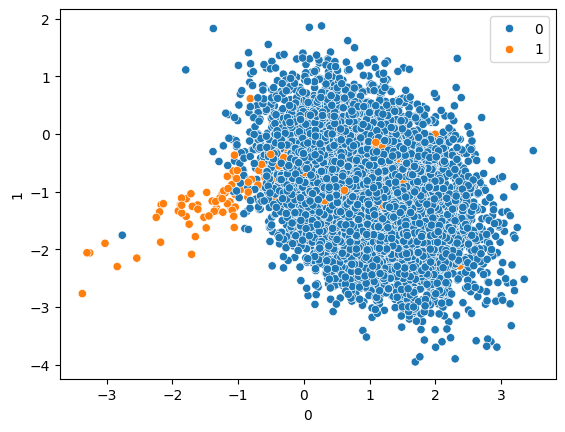

In [51]:
#plot X values

sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [71]:
#split the dataset in train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=50)



In [72]:
#hyper parameter tuning
model=LogisticRegression()

"DO not use l1 and elasticnet with solver lbfgs"
"it will give error"

penalty=['l2']
c_values=[100,10,1.0,0.1,0.01]
solver=['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']

class_weight=[{0:w,1:y} for w in {1,10,50,100} for y in [1,10,50,100]]


In [73]:
print(class_weight)

[{0: 1, 1: 1}, {0: 1, 1: 10}, {0: 1, 1: 50}, {0: 1, 1: 100}, {0: 10, 1: 1}, {0: 10, 1: 10}, {0: 10, 1: 50}, {0: 10, 1: 100}, {0: 100, 1: 1}, {0: 100, 1: 10}, {0: 100, 1: 50}, {0: 100, 1: 100}, {0: 50, 1: 1}, {0: 50, 1: 10}, {0: 50, 1: 50}, {0: 50, 1: 100}]


In [74]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

print(params)

{'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, {0: 1, 1: 50}, {0: 1, 1: 100}, {0: 10, 1: 1}, {0: 10, 1: 10}, {0: 10, 1: 50}, {0: 10, 1: 100}, {0: 100, 1: 1}, {0: 100, 1: 10}, {0: 100, 1: 50}, {0: 100, 1: 100}, {0: 50, 1: 1}, {0: 50, 1: 10}, {0: 50, 1: 50}, {0: 50, 1: 100}]}


In [75]:
#cross validation and hyper parameter tuning
cv=StratifiedKFold()

grid=GridSearchCV(estimator=model,param_grid=params,scoring="accuracy",cv=cv)


In [76]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100}],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [77]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'lbfgs'}

In [78]:
grid.best_score_

0.9887142857142857

In [79]:
y_pred=grid.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
score=accuracy_score(y_test,y_pred)
print(score)

cm=confusion_matrix(y_test,y_pred)
print(cm)

report=classification_report(y_test,y_pred)
print(report)

" change random state value and will get different score each time"

0.9896666666666667
[[2947    2]
 [  29   22]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2949
           1       0.92      0.43      0.59        51

    accuracy                           0.99      3000
   macro avg       0.95      0.72      0.79      3000
weighted avg       0.99      0.99      0.99      3000



' change random state value and will get different score each time'

**Logistic Regression with ROC curve And ROC AUC score**

In [84]:
#generate data

X,y=make_classification(n_samples=1000,n_classes=2,random_state=10)

In [87]:
#train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [123]:
#generate a no skill prediction(majority class)

#we have created dummy model with default 0 as output

dummy_model_prob=[0 for _ in range(len(y_test))]
dummy_model_prob



[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [92]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [103]:
model_prob=model.predict_proba(X_test)
model_prob
#"prediction based on probability"



array([[1.13065538e-01, 8.86934462e-01],
       [2.06735980e-02, 9.79326402e-01],
       [7.38139276e-01, 2.61860724e-01],
       [4.41904333e-02, 9.55809567e-01],
       [7.17429112e-01, 2.82570888e-01],
       [9.82740450e-01, 1.72595502e-02],
       [8.86348468e-02, 9.11365153e-01],
       [7.20089281e-01, 2.79910719e-01],
       [2.91557124e-01, 7.08442876e-01],
       [3.57893887e-01, 6.42106113e-01],
       [9.81418680e-01, 1.85813196e-02],
       [2.57431016e-01, 7.42568984e-01],
       [3.81466697e-01, 6.18533303e-01],
       [8.39082460e-01, 1.60917540e-01],
       [6.80460098e-01, 3.19539902e-01],
       [9.96205855e-01, 3.79414493e-03],
       [5.77415527e-01, 4.22584473e-01],
       [3.58359827e-01, 6.41640173e-01],
       [8.36393959e-01, 1.63606041e-01],
       [2.04706359e-03, 9.97952936e-01],
       [2.95088114e-01, 7.04911886e-01],
       [4.40029157e-01, 5.59970843e-01],
       [4.83709070e-01, 5.16290930e-01],
       [1.96812336e-01, 8.03187664e-01],
       [4.372380

In [104]:
#focus on positive outcome

model_prob=model_prob[:,1]
model_prob

array([0.88693446, 0.9793264 , 0.26186072, 0.95580957, 0.28257089,
       0.01725955, 0.91136515, 0.27991072, 0.70844288, 0.64210611,
       0.01858132, 0.74256898, 0.6185333 , 0.16091754, 0.3195399 ,
       0.00379414, 0.42258447, 0.64164017, 0.16360604, 0.99795294,
       0.70491189, 0.55997084, 0.51629093, 0.80318766, 0.56276199,
       0.16844958, 0.07825938, 0.19080573, 0.02440661, 0.225     ,
       0.15175067, 0.92633801, 0.00255358, 0.1573022 , 0.73082309,
       0.87201986, 0.29656442, 0.52380528, 0.89271603, 0.89934809,
       0.73076484, 0.23441411, 0.97299495, 0.12989933, 0.00544008,
       0.04607249, 0.28776338, 0.99734486, 0.99573341, 0.06016335,
       0.14973033, 0.92504064, 0.82048662, 0.00405641, 0.91263495,
       0.8562254 , 0.71302202, 0.75336612, 0.71523538, 0.04867609,
       0.7790271 , 0.12185798, 0.97935633, 0.98248591, 0.79166857,
       0.29347002, 0.05556753, 0.10626919, 0.94157343, 0.06136238,
       0.01172785, 0.94861221, 0.00683084, 0.00369386, 0.19521

In [106]:
#calculate score
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
print(dummy_model_auc)

model_auc=roc_auc_score(y_test,model_prob)
print(model_auc)


0.5
0.9332298136645962


In [118]:
"roc auc curve gives us False positive rate:- FP/FP+TN"

'roc auc curve gives us False positive rate:- FP/FP+TN'

In [119]:
"Sensitivity , recall, hit rate or true positive rate(TPR):- TP/TP+FN =1-FNR"

'Sensitivity , recall, hit rate or true positive rate(TPR):- TP/TP+FN =1-FNR'

In [126]:
#calculate roc curve
#TPR on y-axis and FPR on x-axis gives us roc curve

dummy_fpr,dummy_tpr,_=roc_curve(y_test,dummy_model_prob)

model_fpr,model_tpr,_=roc_curve(y_test,model_prob)


In [128]:
model_fpr,model_tpr

(array([0.        , 0.        , 0.        , 0.00724638, 0.00724638,
        0.01449275, 0.01449275, 0.02898551, 0.02898551, 0.05797101,
        0.05797101, 0.0942029 , 0.0942029 , 0.11594203, 0.11594203,
        0.13043478, 0.13043478, 0.15217391, 0.15217391, 0.19565217,
        0.19565217, 0.21014493, 0.21014493, 0.23913043, 0.23913043,
        0.24637681, 0.24637681, 0.25362319, 0.25362319, 0.2826087 ,
        0.2826087 , 0.33333333, 0.33333333, 0.37681159, 0.37681159,
        0.39130435, 0.39130435, 0.41304348, 0.41304348, 0.47826087,
        0.47826087, 0.57246377, 0.57246377, 0.62318841, 0.62318841,
        0.65217391, 0.65217391, 1.        ]),
 array([0.        , 0.00892857, 0.45535714, 0.45535714, 0.60714286,
        0.60714286, 0.78571429, 0.78571429, 0.79464286, 0.79464286,
        0.8125    , 0.8125    , 0.82142857, 0.82142857, 0.83035714,
        0.83035714, 0.83928571, 0.83928571, 0.84821429, 0.84821429,
        0.85714286, 0.85714286, 0.875     , 0.875     , 0.88392857,
  

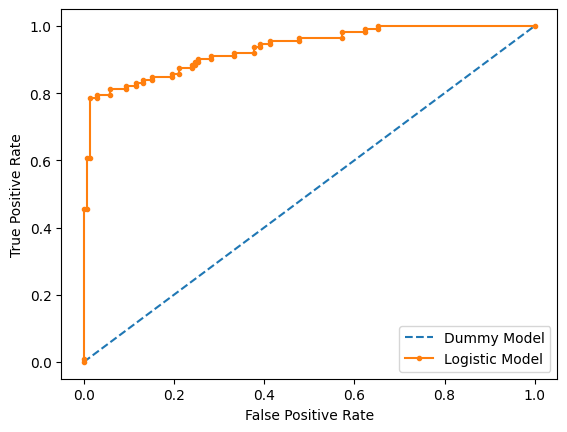

In [134]:
#plot the roc curve
import matplotlib.pyplot as plt

plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label="Dummy Model")

plt.plot(model_fpr,model_tpr,marker='.',label="Logistic Model")

#axis label
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

#show the legend
plt.legend()

plt.show()

In [136]:
#find out logistic regression thrshold
#default is 0.5

#in roc curve ' _ ' is added. that is our threshold value
#we can define threshold value using that...

#model_fpr,model_tpr,_=roc_curve(y_test,model_prob)

model_fpr,model_tpr,thresholds=roc_curve(y_test,model_prob)



array([       inf, 0.99939857, 0.93442433, 0.92844402, 0.8910509 ,
       0.8896078 , 0.76370196, 0.74256898, 0.73082309, 0.71302202,
       0.70491189, 0.64210611, 0.64164017, 0.61317626, 0.60357166,
       0.5710131 , 0.5661616 , 0.55541304, 0.55140862, 0.47097898,
       0.46940336, 0.42258447, 0.4112114 , 0.37850837, 0.37727837,
       0.36942032, 0.36669827, 0.36522135, 0.35955718, 0.31451015,
       0.30883277, 0.27991072, 0.26947891, 0.23441411, 0.21874884,
       0.21290478, 0.20957711, 0.19293716, 0.19080573, 0.15337463,
       0.15240452, 0.10023479, 0.0797502 , 0.06610106, 0.06433437,
       0.05991056, 0.0576045 , 0.00113225])

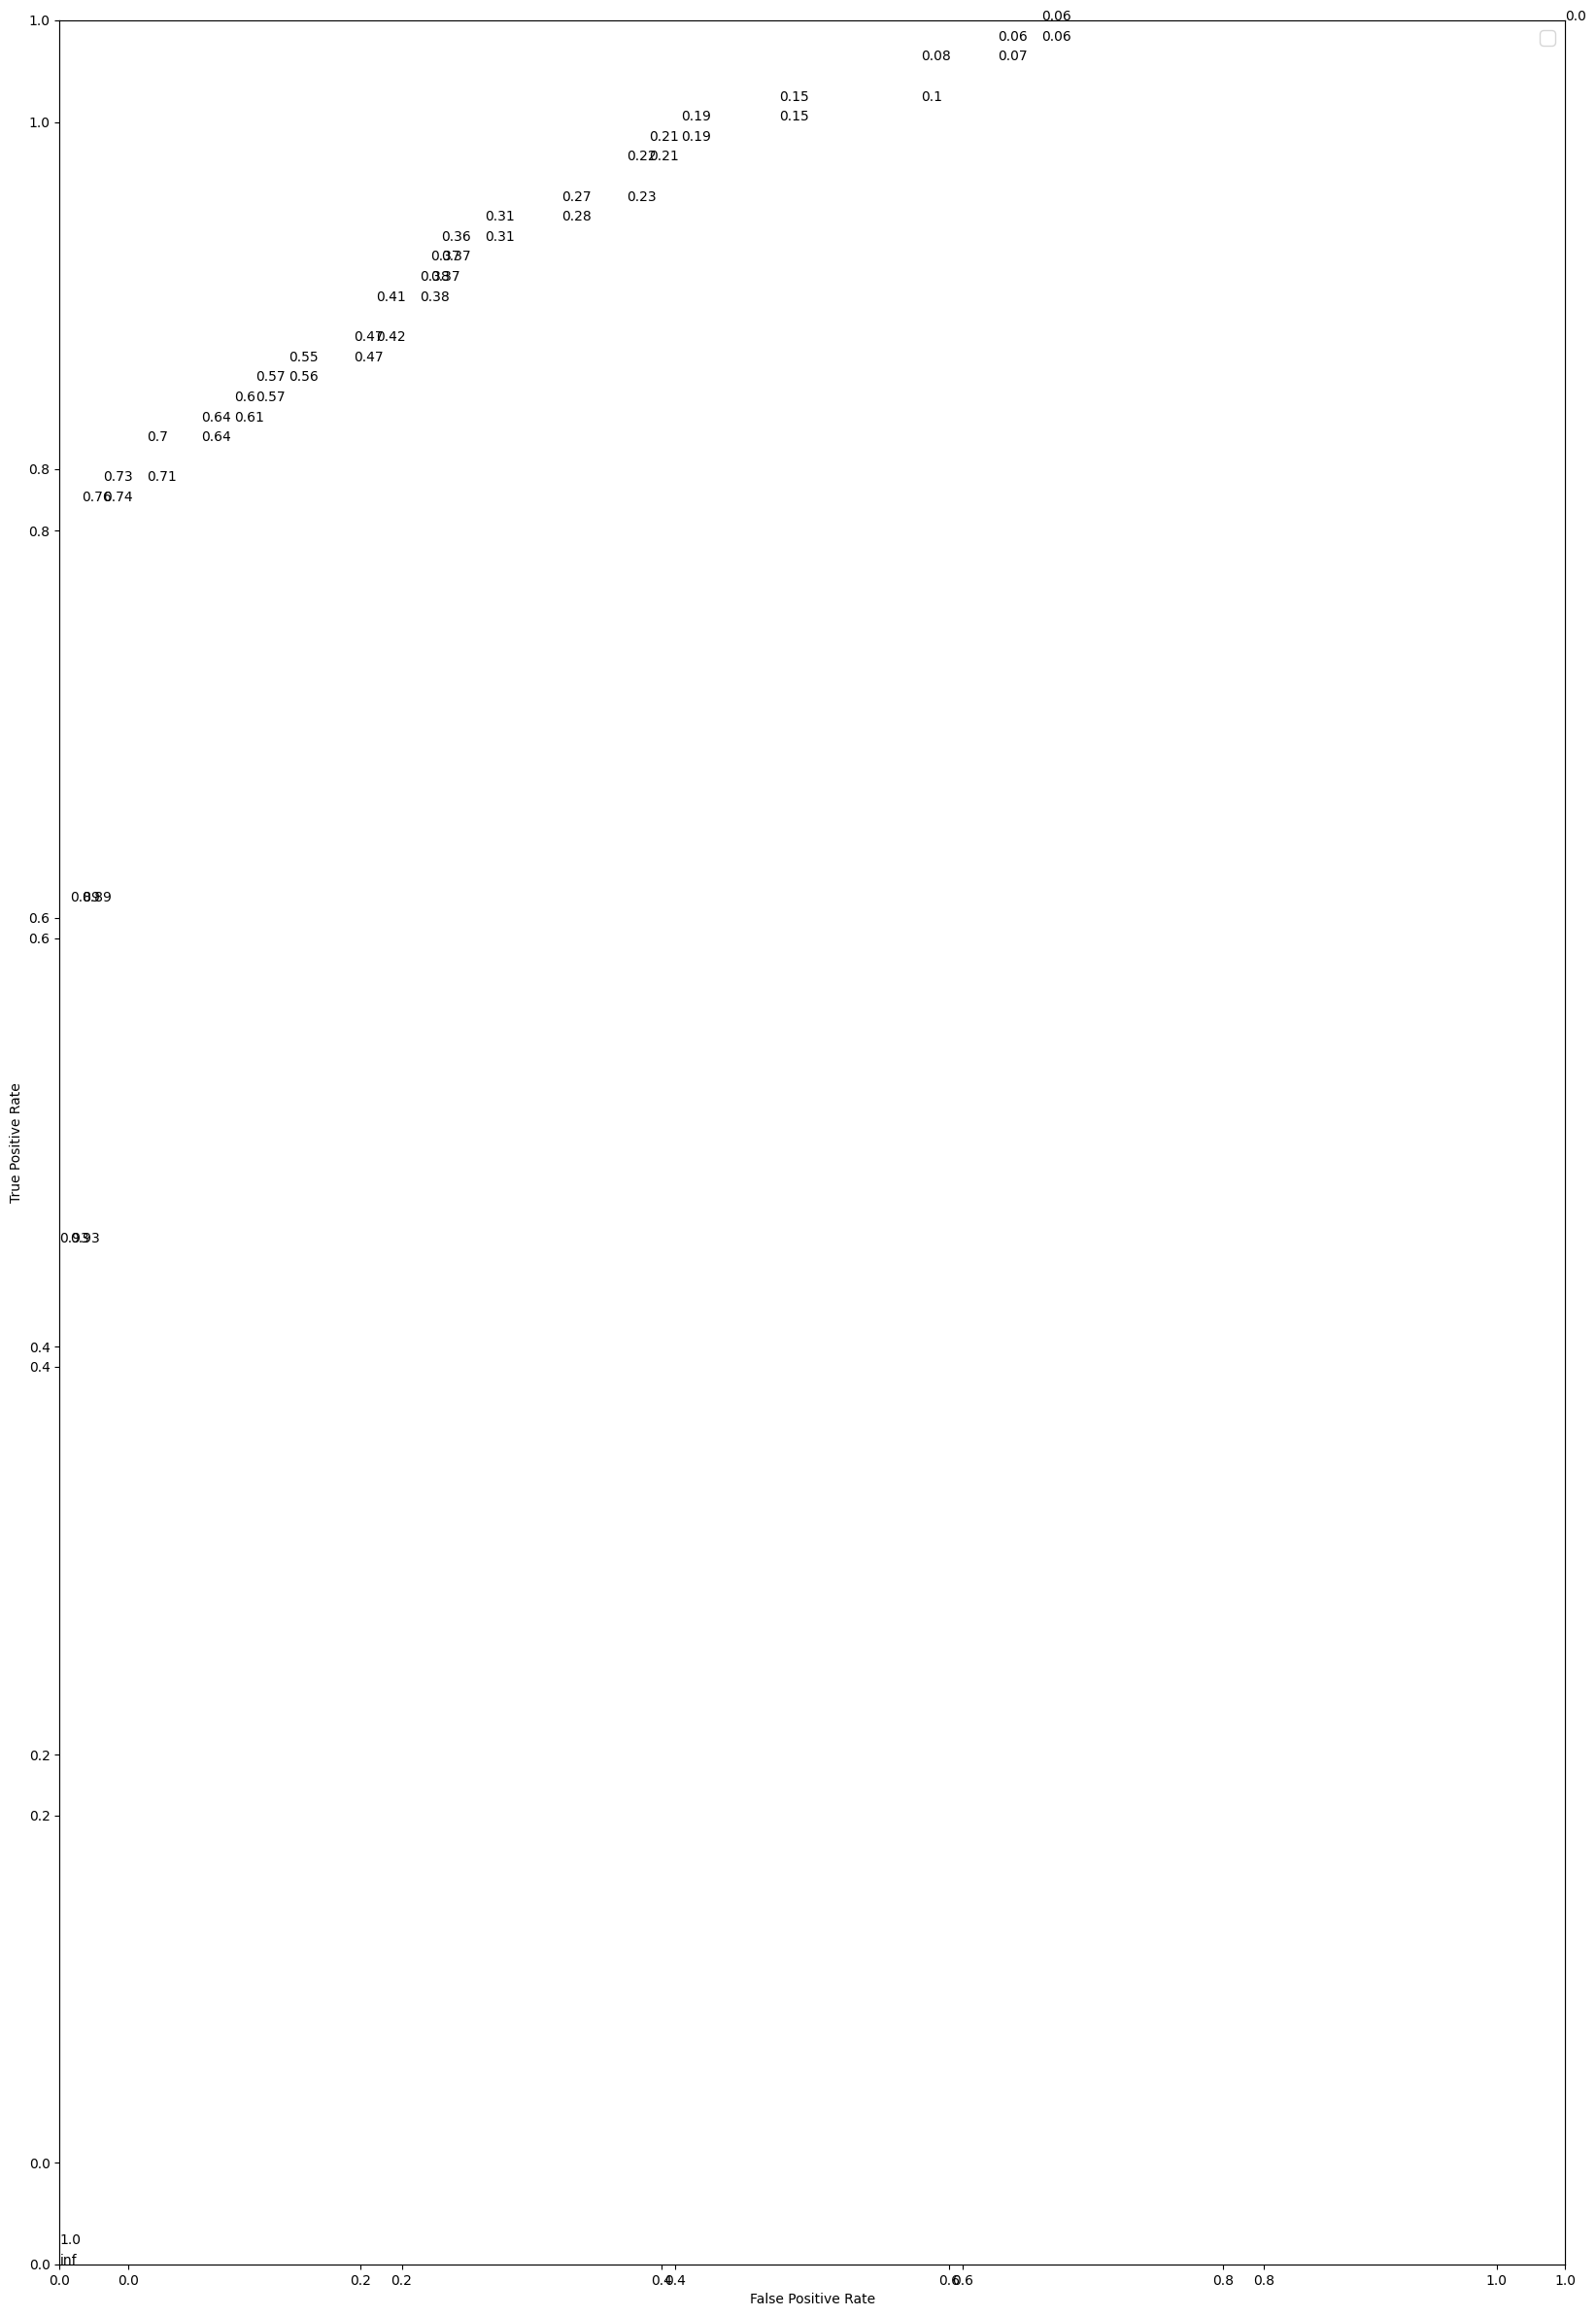

In [157]:
#plot the roc curve
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,30))

plt.plot(dummy_fpr,dummy_tpr,linestyle='-',label="Dummy Model")

plt.plot(model_fpr,model_tpr,marker='.',label="Logistic Model")

ax= fig.add_subplot(1,1,1)

for xyz in zip(model_fpr,model_tpr,thresholds):
    ax.annotate("%s" % np.round(xyz[2],2),xy=(xyz[0],xyz[1]))

#axis label
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

#show the legend
plt.legend(["This is my legend"], fontsize="x-large")
#plt.legend()

plt.show()